In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


df_stop = pd.read_csv('stopping_condition_nobirth.csv')
df_grouped = df_stop.groupby("prob_random")
np.unique(df_stop["state_counts"])

array(['No ants left', 'No predators left'], dtype=object)

0.0


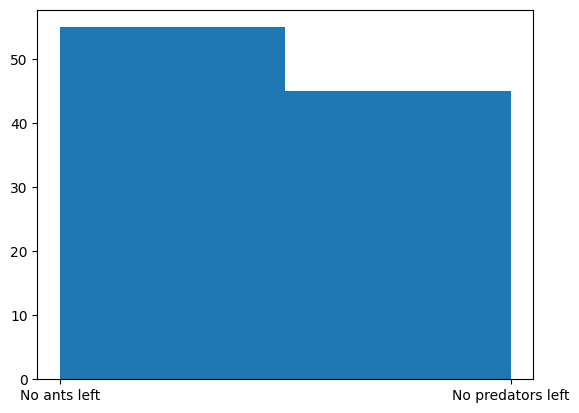

0.1111111111111111


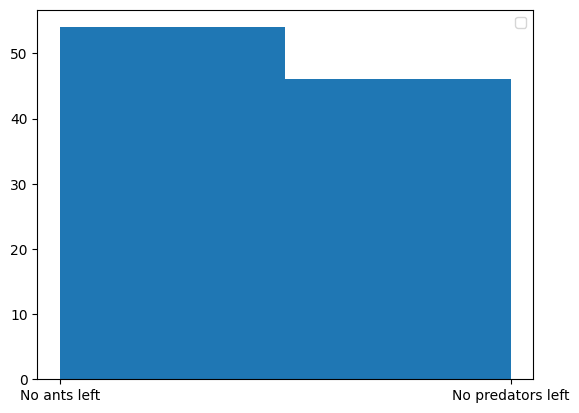

0.2222222222222222


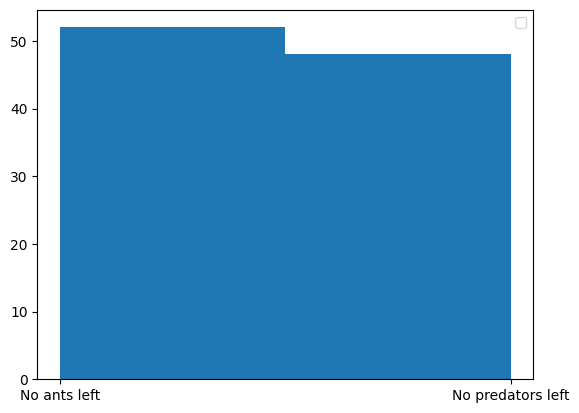

0.3333333333333333


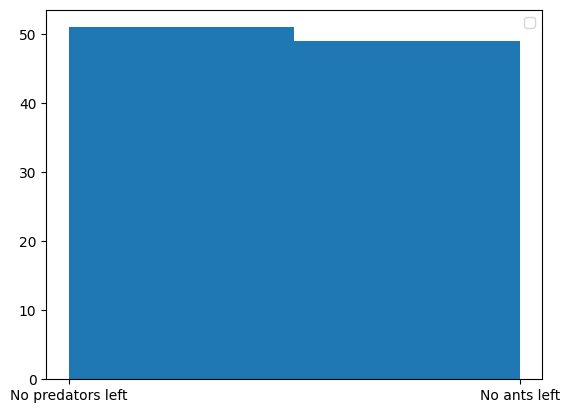

0.4444444444444444


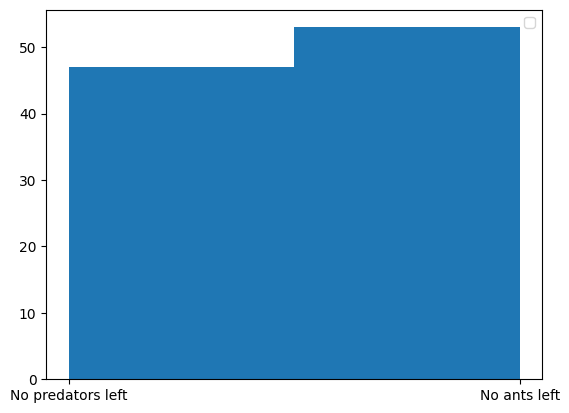

0.5555555555555556


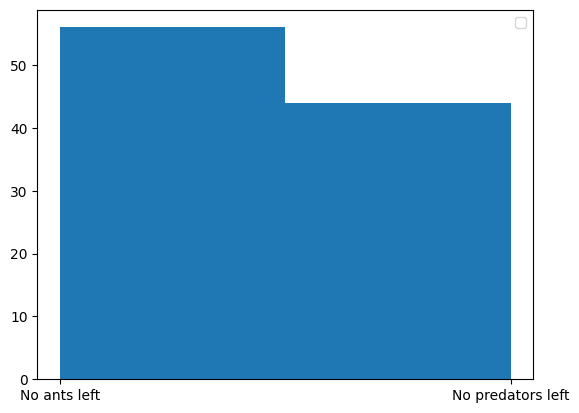

0.6666666666666666


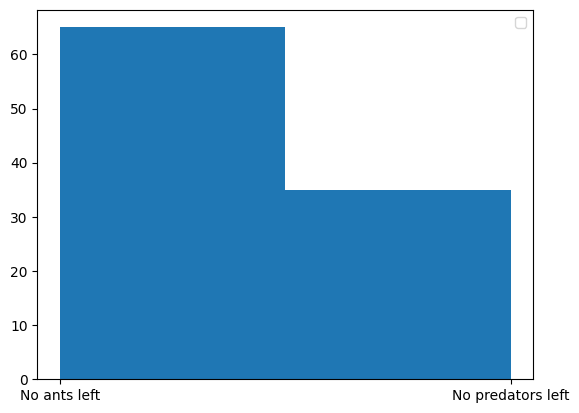

0.7777777777777777


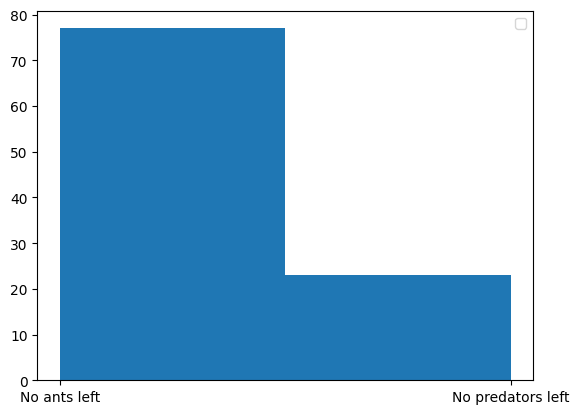

0.8888888888888888


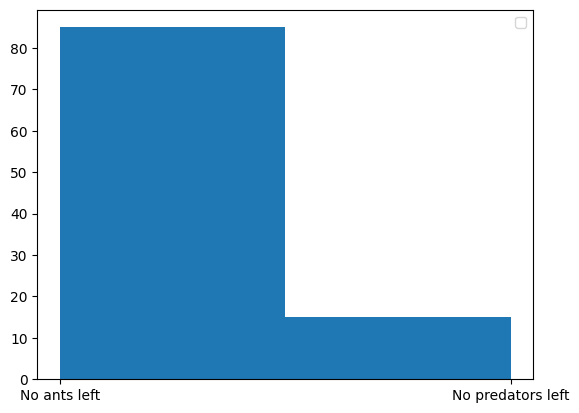

1.0


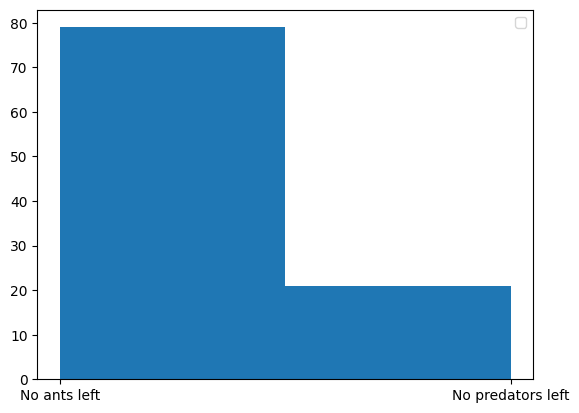

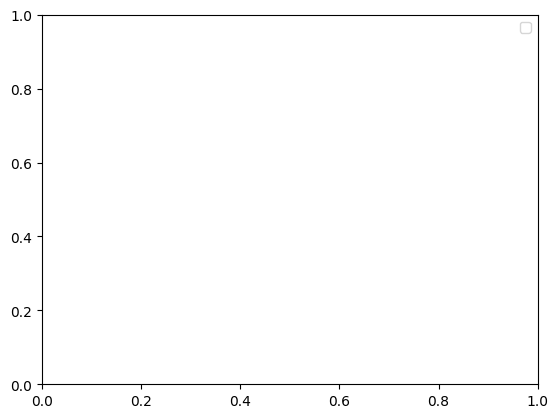

In [4]:
for name, group in df_grouped:
    print(name)
    plt.hist(group["state_counts"], label=np.round(group["prob_random"].mean(),2), 
             bins=2)
    plt.show()
    plt.legend()


In [17]:
steps_mean = {}
steps_std = {} 
for name, group in df_grouped:
    print(name)
    steps_mean[name] = group["Step"].mean()
    steps_std[name] = group["Step"].std()

0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0


Text(0, 0.5, 'Mean steps')

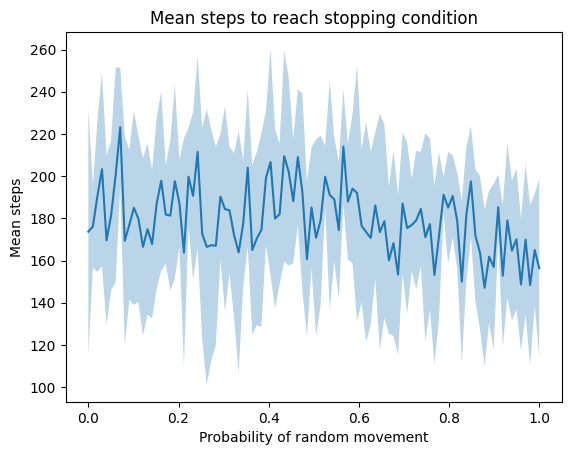

In [16]:
plt.plot(steps_mean.keys(), steps_mean.values())
plt.fill_between(steps_mean.keys(), np.array(list(steps_mean.values()))-np.array(list(steps_std.values())), 
                 np.array(list(steps_mean.values()))+np.array(list(steps_std.values())), alpha=0.3)
plt.title("Mean steps to reach stopping condition")
plt.xlabel("Probability of random movement")
plt.ylabel("Mean steps")

In [13]:

def plot_prob_random(df_grouped):
    ants_died_list = []
    
    for name, group in df_grouped:
        ants_died = group["state_counts"].value_counts(normalize=True)[0]
        ants_died_list.append(ants_died)
    plt.plot(df_grouped["prob_random"].mean(), ants_died_list)

    plt.title("ratio of ants died vs prob_random")
    plt.show()
    return ants_died_list
    # plt.plot(ratio_state, label=group["prob_random"].mean())
    # print(ratio_state)
    # print(name)






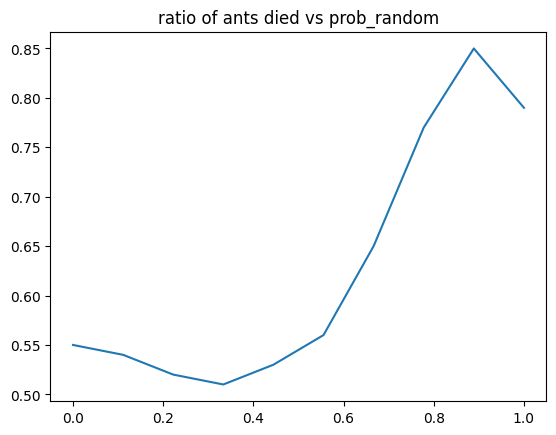

In [36]:
plot_prob_random(df_grouped)

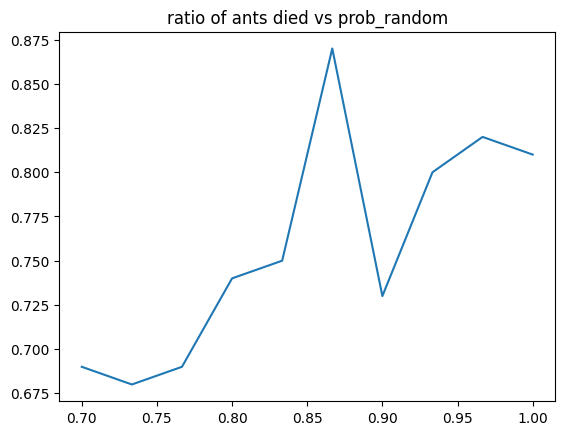

In [37]:
df_closer = pd.read_csv('stopping_condition_nobirth_closer.csv')
df_grouped_closer = df_closer.groupby("prob_random")
plot_prob_random(df_grouped_closer)

Calculating best minimal value for power law fit


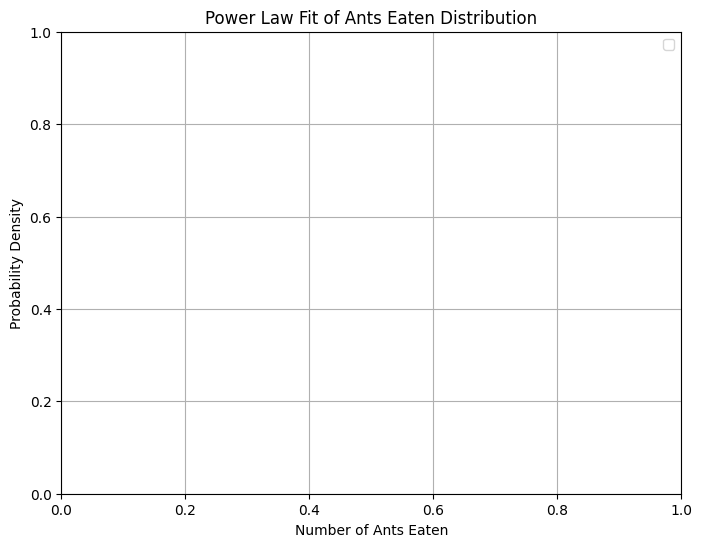

In [39]:
import powerlaw
results = powerlaw.Fit(df_stop["state_counts"].value_counts())


plt.figure(figsize=(8, 6))
# results.plot_pdf(color='blue', linestyle='-', label='Empirical Data')
# results.power_law.plot_pdf(color='red', linestyle='--', label='Power Law Fit')
plt.title("Power Law Fit of Ants Eaten Distribution")
plt.xlabel("Number of Ants Eaten")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

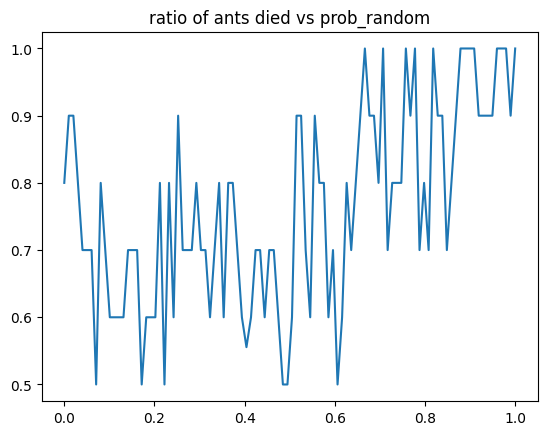

[np.float64(0.8),
 np.float64(0.9),
 np.float64(0.9),
 np.float64(0.8),
 np.float64(0.7),
 np.float64(0.7),
 np.float64(0.7),
 np.float64(0.5),
 np.float64(0.8),
 np.float64(0.7),
 np.float64(0.6),
 np.float64(0.6),
 np.float64(0.6),
 np.float64(0.6),
 np.float64(0.7),
 np.float64(0.7),
 np.float64(0.7),
 np.float64(0.5),
 np.float64(0.6),
 np.float64(0.6),
 np.float64(0.6),
 np.float64(0.8),
 np.float64(0.5),
 np.float64(0.8),
 np.float64(0.6),
 np.float64(0.9),
 np.float64(0.7),
 np.float64(0.7),
 np.float64(0.7),
 np.float64(0.8),
 np.float64(0.7),
 np.float64(0.7),
 np.float64(0.6),
 np.float64(0.7),
 np.float64(0.8),
 np.float64(0.6),
 np.float64(0.8),
 np.float64(0.8),
 np.float64(0.7),
 np.float64(0.6),
 np.float64(0.5555555555555556),
 np.float64(0.6),
 np.float64(0.7),
 np.float64(0.7),
 np.float64(0.6),
 np.float64(0.7),
 np.float64(0.7),
 np.float64(0.6),
 np.float64(0.5),
 np.float64(0.5),
 np.float64(0.6),
 np.float64(0.9),
 np.float64(0.9),
 np.float64(0.7),
 np.float64(0

In [14]:
df_death_count = pd.read_csv('death_count.csv')
df_grouped_death = df_death_count.groupby("prob_random")
plot_prob_random(df_grouped_death)

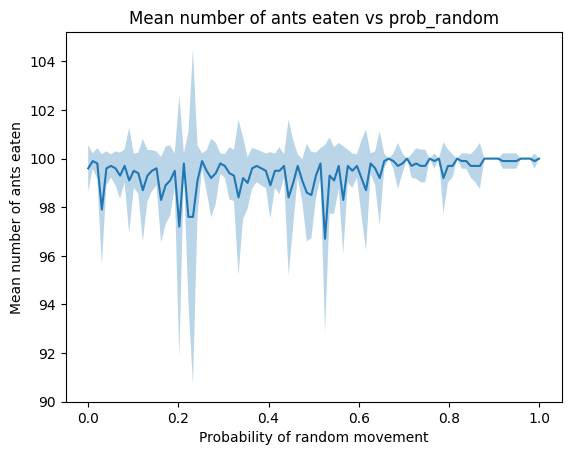

In [9]:
mean_dead_ants = df_death_count.groupby("prob_random")["dead_ants"].mean()
std_dead_ants = df_death_count.groupby("prob_random")["dead_ants"].std()

plt.plot(mean_dead_ants.keys(), mean_dead_ants.values)
plt.fill_between(mean_dead_ants.keys(), mean_dead_ants.values-std_dead_ants.values, mean_dead_ants.values+std_dead_ants.values, alpha=0.3)
plt.title("Mean number of ants eaten vs prob_random")
plt.xlabel("Probability of random movement")
plt.ylabel("Mean number of ants eaten")
plt.show()

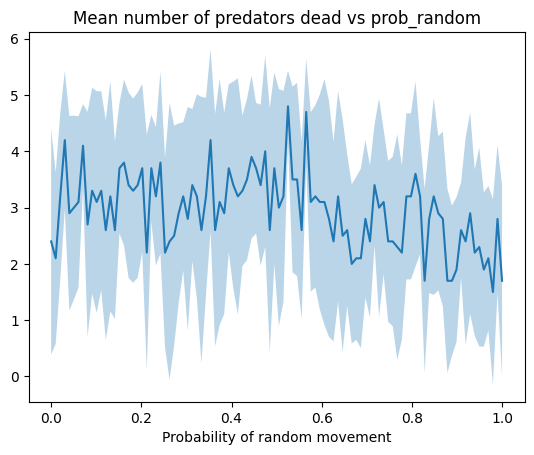

In [8]:
mean_dead_ants = df_death_count.groupby("prob_random")["dead_predators"].mean()
std_dead_ants = df_death_count.groupby("prob_random")["dead_predators"].std()

plt.plot(mean_dead_ants.keys(), mean_dead_ants.values)
plt.fill_between(mean_dead_ants.keys(), mean_dead_ants.values-std_dead_ants.values, mean_dead_ants.values+std_dead_ants.values, alpha=0.3)
plt.title("Mean number of predators dead vs prob_random")
plt.xlabel("Probability of random movement")
plt.show()

In [12]:
df_grouped_death["state_counts"].value_counts(normalize=True)
for name, group in df_grouped_death:
    print(name)
    print(group["state_counts"].value_counts(normalize=True))
    

0.0
state_counts
No ants left         0.8
No predators left    0.2
Name: proportion, dtype: float64
0.0101010101010101
state_counts
No ants left         0.9
No predators left    0.1
Name: proportion, dtype: float64
0.0202020202020202
state_counts
No ants left         0.9
No predators left    0.1
Name: proportion, dtype: float64
0.0303030303030303
state_counts
No predators left    0.8
No ants left         0.2
Name: proportion, dtype: float64
0.0404040404040404
state_counts
No ants left         0.7
No predators left    0.3
Name: proportion, dtype: float64
0.0505050505050505
state_counts
No ants left         0.7
No predators left    0.3
Name: proportion, dtype: float64
0.0606060606060606
state_counts
No ants left         0.7
No predators left    0.3
Name: proportion, dtype: float64
0.0707070707070707
state_counts
No predators left    0.5
No ants left         0.5
Name: proportion, dtype: float64
0.0808080808080808
state_counts
No ants left         0.8
No predators left    0.2
Name: proport